In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [ ]:
y.shape, tx.shape

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [10]:


def compute_loss(y, tx, w, loss):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
        
    """
    # ***************************************************
    e = (y-np.dot(tx,w))
    
    match loss: 
        case 'mse':
            mse = (1/2)*np.mean(e**2)
            return mse , e
        case 'mae':
            mae = np.mean(np.abs(e))
            return mae, e
        case other:
            print("incorrect loss type, use 'mae' or 'mse' " )
    # ***************************************************
   # raise NotImplementedError

w = np.array([1,2])
#w.shape
print(compute_loss(y, tx, w, 'mse'))


(2694.4833658870843, array([104.9315547 ,  71.43388117,  91.55946151, ...,  58.62717056,
        72.00276808,  52.89610924]))


# 2. Grid Search

Fill in the function `grid_search()` below:

In [13]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    e= []
    # ***************************************************
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    dim = grid_w0.shape[0]
    dim1 = grid_w1.shape[0]
    grid_vector= np.zeros((dim,0))
    for grid in range(dim):
            for grid_1 in range(dim1):
                w = np.array([ grid_w0[grid] , grid_w1[grid_1]])
                losses[grid,grid_1] , e = compute_loss(y, tx, w, 'mse')
    #raise NotImplementedError
    return losses
    # ***************************************************

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.497 seconds


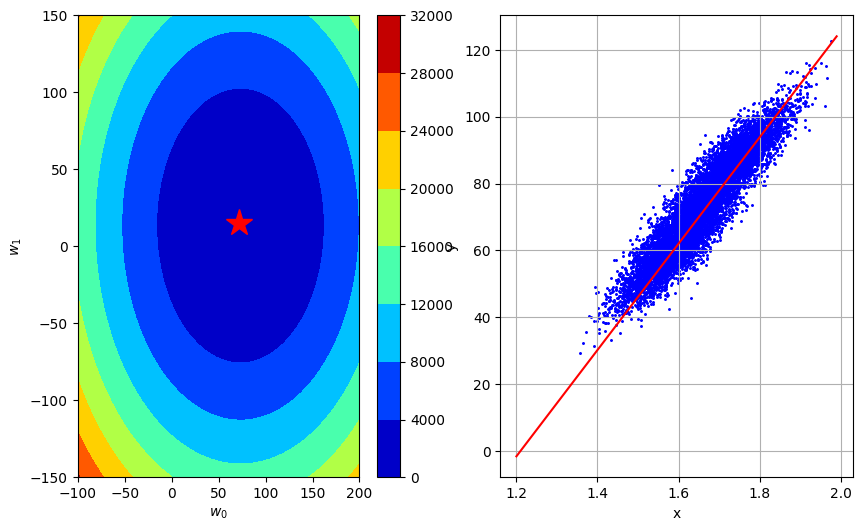

In [15]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [16]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    N = y.shape[0] #takes the dim of Y 
    error = y- np.dot(tx,w)  #(N,1) the error must be the same dim of y, for each point. X_ (N,D) wt(D,1)
    D_L = np.zeros(N) #tx(N)*
    D_L = -(1/N)*np.dot(np.transpose(tx),error)
    
    return D_L
    # ***************************************************
    #raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [21]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    #gradient = compute_gradient(y, tx, initial_w)
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w, 'mse')
        w = w - gamma*gradient #here we compute w(t+1) = w(t) - gamma*Grad(error)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


Test your gradient descent function through gradient descent demo shown below:

In [22]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=(2792.2367127591674, array([109.81967768,  73.68895452,  96.58434842, ...,  58.32779473,
        74.38901745,  51.59669261])), w0=51.30574540147362, w1=9.435798704492278
GD iter. 1/49: loss=(265.30246210896024, array([40.17015936, 16.46189935, 26.28959165, ..., 13.15237373,
       16.54308704, 11.13936341])), w0=66.69746902191572, w1=12.266538315840002
GD iter. 2/49: loss=(37.87837955044118, array([19.27530387, -0.70621721,  5.20116462, ..., -0.40025257,
       -0.81069209, -0.99783536])), w0=71.31498610804834, w1=13.11576019924433
GD iter. 3/49: loss=(17.41021212017447, array([13.00684722, -5.85665217, -1.12536349, ..., -4.46604046,
       -6.01682582, -4.63899499])), w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=(15.568077051450455, array([11.12631022, -7.40178266, -3.02332192, ..., -5.68577683,
       -7.57866595, -5.73134287])), w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=(15.402284895265295, array([10.56214913, -7.86532181,

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [35]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    error = y - np.dot(tx , w)  
    S_L = -np.dot(tx.T,error)
    return S_L
    # ***************************************************
   # raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        ###this is my solution before batch iter 
        #random = np.random.randint(y.shape[0], size=batch_size)
        #y_s= y[random]
        #tx_s= tx[random,:]  #takes a random sample of the size of the minibatch, and thakes the pair of each x 
        for y_s, tx_s in batch_iter(y, tx, batch_size, num_batches=1, shuffle=True): #generates a shuffled batch of y and tx in each iter
            gradient = compute_stoch_gradient(y_s, tx_s, w)
            loss = compute_loss(y_s, tx_s, w, 'mse')
            w = w - gamma*gradient
            ws.append(w)
            losses.append(loss)
        #raise NotImplementedError

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [42]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=(4011.267908778562, array([89.56860955])), w0=17.913721910934225, w1=19.16056963489687
SGD iter. 1/49: loss=(1618.8406062522638, array([56.90062577])), w0=29.293847064032548, w1=19.976031153233514
SGD iter. 2/49: loss=(576.0956266595009, array([33.94394281])), w0=36.08263562553305, w1=17.013440233971952
SGD iter. 3/49: loss=(926.1995391319136, array([43.03950602])), w0=44.69053682911068, w1=7.836936186660187
SGD iter. 4/49: loss=(142.20659990290704, array([16.86455454])), w0=48.063447736951645, w1=-0.23693976111699477
SGD iter. 5/49: loss=(454.2338690556745, array([30.14079856])), w0=54.09160744987017, w1=1.4260235121271903
SGD iter. 6/49: loss=(5.741867617582256, array([-3.38876603])), w0=53.41385424301196, w1=2.4424470458211847
SGD iter. 7/49: loss=(65.16581147677552, array([11.41628762])), w0=55.69711176640744, w1=3.341400263068981
SGD iter. 8/49: loss=(56.062348811487084, array([-10.58889501])), w0=53.579332763555875, w1=8.040423064668026
SGD iter. 9/49: loss=(

In [43]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

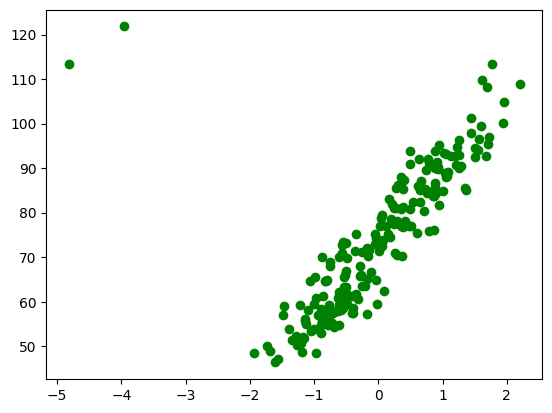

In [49]:
import datetime
from helpers import *

# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

fig, ax = plt.subplots()
ax.scatter(x , y , color='green')
# ***************************************************
#raise NotImplementedError

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [52]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
# ***************************************************
#raise NotImplementedError


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=(3625.879475385718, array([85.15726012])), w0=59.61008208246322, w1=38.33607374745663
SGD iter. 1/49: loss=(79.60806316731525, array([-12.61808727])), w0=50.777420993982076, w1=27.82094740596675
SGD iter. 2/49: loss=(69.22878758106464, array([11.7667997])), w0=59.01418078345289, w1=30.159726702101644
SGD iter. 3/49: loss=(104.37863580042661, array([14.44843492])), w0=69.12808522656576, w1=26.07735292660447
SGD iter. 4/49: loss=(113.05425438074049, array([15.03690489])), w0=79.65391865167399, w1=22.453760868635992
SGD iter. 5/49: loss=(3.396613830258065, array([-2.6063821])), w0=77.82945118042302, w1=24.36714330077132
SGD iter. 6/49: loss=(0.9204886347542229, array([-1.35682618])), w0=76.87967285783446, w1=24.53947982467588
SGD iter. 7/49: loss=(123.97635002991542, array([-15.7465139])), w0=65.8571131265689, w1=20.43417120631513
SGD iter. 8/49: loss=(68.43491432806813, array([11.69913794])), w0=74.04650968806882, w1=22.22289636172793
SGD iter. 9/49: loss=(51.6519049

In [53]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [54]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    e = y-tx.dot(w)
    S_g = -np.dot(tx.T, np.sign(e))/e.shape[0]  #First sign is the sign of w. second sign is due to the change of direction when the MAE is < 0
    
    return S_g, e
    # ***************************************************
   # raise NotImplementedError

In [55]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        s_g, loss = compute_subgradient_mae(y, tx, w)
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma*s_g
    # raise NotImplementedError
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [58]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/49: loss=[109.81967768  75.18767829  91.17170674  81.09273097  89.01193424
  78.15735857  89.4701687   75.14363177  92.09993504  80.41209897
  94.78696144  72.79658636  83.6467126  101.33572901  85.26667609
  90.60407223  93.04174311  84.79016933 108.3105307   78.71762092
  71.40879193  93.75088386  90.08228887  90.79165562  71.28563111
  90.2366435   85.41789452  94.07309505  85.15726012  88.03583219
  77.56442917  82.01947566  76.90432986  70.4438144   92.80952003
 113.47561257  89.90269781  90.54889225  87.3730611   70.04343359
  85.89657352  77.00360899  79.39905508  93.24511229  90.06827241
  85.714425    71.03312734  60.6144405   84.92377468  94.53236342
  55.69677074  88.25809004  70.90632831  92.63041056  97.93193794
  85.53141276  92.39509024  84.42765377  69.86214527  90.93952077
  86.21899073  75.47898726  87.06078885  85.45328716  84.32116622
  80.86341682  74.26125313  78.05020106  93.41726092 104.86810781
  84.99920066  92.78266656  69.97244619  96.30245372 

In [59]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [60]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
     # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
            s_g, loss = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            w = w - gamma*s_g
            ws.append(w)
            losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [61]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=[ 71.40879193  71.59178255  55.198237    84.92377468  61.17676972
  92.08877013  65.5466894   84.79016933  77.46015523  81.06484297
  77.00360899  57.49140583  75.47898726  70.4438144   61.165144
  96.46825937 121.8061674   84.99920066  58.65748371  73.10088018
  54.89129618  86.21899073  86.63452181  50.80215289  93.75815351
  73.41075284  96.99880931  91.37457809  57.42363839  54.84776227
  82.45590079  46.34810017], w0=0.7, w1=-0.035161553828469964
SubSGD iter. 1/499: loss=[107.66984345 112.56668767  58.32255389  73.56004931  64.82782343
  56.31520238  49.24826472  56.49020906  89.30671356  73.840826
  83.7593577   54.95659461  80.61150335  58.7440447   77.46752713
  67.19489503  94.12997015  70.70911481  72.69155835  95.64661905
  50.73936982  57.07468161  67.20543973  50.30390384  58.49697521
  55.27747667  89.93539053  69.51032035  66.01840406 109.17619385
  89.41246195  78.70092805], w0=1.4, w1=-0.195652431531991
SubSGD iter. 2/499: loss=[ 46.61231781  6

In [62]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>